In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

ImportError: matplotlib requires dateutil

In [93]:
from matplotlib import pyplot as plt
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [94]:
from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures


In [95]:
df = loadmat('ex5data1.mat')
print df.keys()

['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']


In [96]:
X = np.c_[np.ones_like(df['X']),df['X']]
y = df['y']
yval = df['yval']
Xval = np.c_[np.ones_like(df['Xval']), df['Xval']]

In [97]:
print X

[[  1.         -15.93675813]
 [  1.         -29.15297922]
 [  1.          36.18954863]
 [  1.          37.49218733]
 [  1.         -48.05882945]
 [  1.          -8.94145794]
 [  1.          15.30779289]
 [  1.         -34.70626581]
 [  1.           1.38915437]
 [  1.         -44.38375985]
 [  1.           7.01350208]
 [  1.          22.76274892]]


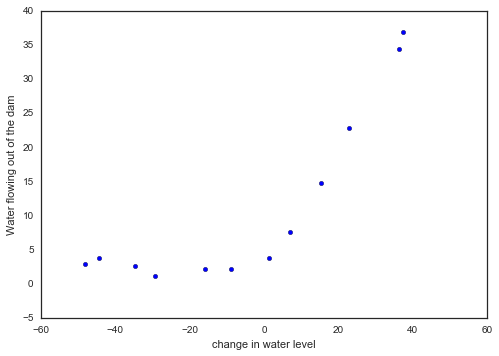

In [98]:
plt.scatter(X[:,1],y)
plt.xlabel('change in water level')
plt.ylabel('Water flowing out of the dam')
plt.show()

In [99]:
from scipy.special import expit

In [100]:
def costFunction(theta, reg, X, y):
    m = y.size
    h = X.dot(theta)
    j = (1./(2*m))*np.sum(np.square(h-y))+ (reg/(2*m))*np.sum(np.square(theta[1:]))
    return (j)
    
    

In [101]:
h = expit(X.dot(np.ones(X.shape[1])))
print h.T.dot(y)

[ 119.71163405]


In [102]:
theta = np.ones((X.shape[1],1))
print costFunction(theta, 1, X, y)

303.951525554


In [103]:
def gradient(theta, reg, X, y):
    m = y.size
    
    h = X.dot(theta.reshape(-1,1))
        
    grad = (1/m)*(X.T.dot(h-y))+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [104]:
print gradient(theta, 1, X,y)

[ 0.  0.]


In [105]:
np.r_[[[0]],theta[1:].reshape(-1,1)]

array([[ 0.],
       [ 1.]])

In [106]:
def trainLinearReg(X, y):
    #initial_theta = np.zeros((X.shape[1],1))
    initial_theta = np.array([[15],[15]])
    # For some reason the minimize() function does not converge when using
    # zeros as initial theta.
        
    res = minimize(costFunction, initial_theta, args=(X,y,0), method=None, jac=gradient,options={'maxiter':5000})
    
    return(res)

In [107]:
regr = LinearRegression()
regr.fit(X[:,1:],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
pred = regr.predict(X[:,1:])

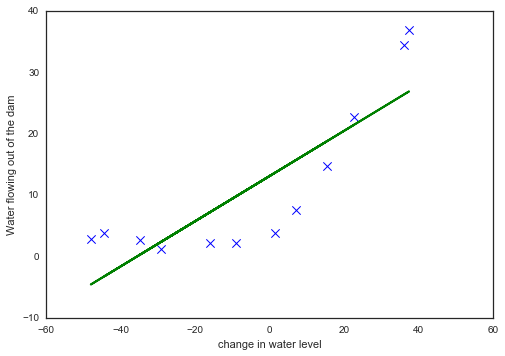

In [109]:
plt.scatter(X[:,1:], y, s= 70, marker='x', linewidths=1)
plt.xlabel('change in water level')
plt.ylabel('Water flowing out of the dam')
plt.grid
plt.plot(X[:,1:],pred, linewidth=2, c = 'g')
plt.show()

## Learners curves

In [110]:
from sklearn.learning_curve import learning_curve

In [111]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [112]:
title = "Learning Curves"

In [113]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X[:,1].reshape(-1,1))


In [114]:
estimator = Ridge(alpha=20)

In [115]:
estimator.fit(X_train_poly,y)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
pre = estimator.predict(Xval[:,1].reshape(-1,1))

ValueError: shapes (21,1) and (9,1) not aligned: 1 (dim 1) != 9 (dim 0)

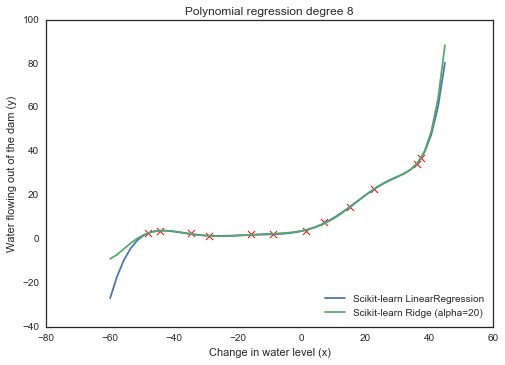

In [118]:
regr2 = LinearRegression()
regr2.fit(X_train_poly, y)

regr3 = Ridge(alpha=20)
regr3.fit(X_train_poly, y)

# plot range for x
plot_x = np.linspace(-60,45)
# using coefficients to calculate y
plot_y = regr2.intercept_+ np.sum(regr2.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)
plot_y2 = regr3.intercept_ + np.sum(regr3.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)

plt.plot(plot_x, plot_y, label='Scikit-learn LinearRegression')
plt.plot(plot_x, plot_y2, label='Scikit-learn Ridge (alpha={})'.format(regr3.alpha))
plt.scatter(X[:,1], y, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial regression degree 8')
plt.legend(loc=4);